In [1]:
#Plot BKG Files

import csky as cy
import numpy as np
import pandas as pd
import glob
import healpy as hp
import pickle, datetime, socket
import histlite as hl
now = datetime.datetime.now
import matplotlib.pyplot as plt
import click, sys, os, time
import config as cg
import utils
import histlite.heal as heal
from matplotlib import cm
from config import get_seyfert_ps_conf
flush = sys.stdout.flush

Running as User: shiqiyu on Hostname: cobalt06.icecube.wisc.edu


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import histlite as hl
from scipy.interpolate import make_interp_spline, BSpline


import matplotlib
cy.plotting.mrichman_mpl()
colors=['blue', 'green']#, '#ffd343','purple']

In [3]:
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [4]:
df_orig = pd.read_hdf('/cvmfs/icecube.opensciencegrid.org/users/shiqiyu/selected_xray_fullsky_seyferts_10yr.h5')
idx = np.logical_and(df_orig['DECdeg'] < -5, df_orig['DECdeg'] > -80)
idx2 = df_orig['neutrino_expectation_estes'] >= 0.155 #10 #top 3

cat = df_orig[idx&idx2].sort_values(by='neutrino_expectation_estes', ascending=False).copy(deep=True)
src_dist = cat['DIST']
src_log_lumin = cat['logL2-10-intr']
flux=cat['F2-10-intr']
decs=cat['DECdeg']
ras=cat['RAdeg']

cutoff_GeV = np.inf * 1e3
weights = flux

In [5]:
mask_deg=5
ana_name = 'ESTES'

In [6]:
repo, ana_dir, base_dir, job_basedir = cg.repo, cg.ana_dir, cg.base_dir, cg.job_basedir

In [7]:
src=cy.utils.Sources(dec=decs[1], ra=ras[1], deg=True)

In [8]:
specs = cy.selections.ESTESDataSpecs.ESTES_2011_2021
version = 'version-001-p00'

In [9]:
ana = cy.get_analysis(repo, version, specs,
#    mask_plane=True, strip=mask_deg,
    space_bg_kw = {'bg_mc_weight':'bg_weight'}, 
    energy_kw = {'bg_mc_weight': 'bg_weight'}, 
    load_sig = True)


Setting up Analysis for:
ESTES_2011_2021
Setting up ESTES_2011_2021...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/estes/version-001-p00/MC_All_Combined.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/estes/version-001-p00/IC86_2011_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/estes/version-001-p00/IC86_2012_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/estes/version-001-p00/IC86_2013_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/estes/version-001-p00/IC86_2014_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/estes/version-001-p00/IC86_2015_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/estes/version-001-p00/IC86_2016_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/estes/version-001-p00/IC86_2017_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data

In [10]:
def plot_sky_map_sig(cat, n=30, weighted=False):
    if weighted:
        weights=cat['neutrino_expectation_estes'][0:n]
        vmax=np.max(cat['neutrino_expectation_estes'])
    else:
        weights=None
        vmax=1
    bg_map = heal.hist(50, np.radians(cat['DECdeg'][0:n]), np.radians(cat['RAdeg'][0:n]), weights=weights)

    fig, ax = plt.subplots (figsize=(20,10), subplot_kw=dict (projection='aitoff'))

    cmap=cm.get_cmap('Blues')
    if weighted:
        cmap.set_under('white', 1.0)
        sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap=cmap, vmin=1, vmax =vmax))
    else:
        sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap=cmap, vmin=0, vmax =vmax))
    mesh, cb = sp.plot_map(ax, bg_map.map, n_ticks=2)
    kw = dict(color='.5', alpha=1)#.5)
    sp.plot_gp(ax, lw=.5, **kw)
    sp.plot_gc(ax, **kw)
    cb.set_label ('{} Seyfert Galaxies {}'.format(n, r"(weighted by $\nu_{exp}$)" if weighted else ""))

    ax.grid(**kw)
    plt.tight_layout()
    plt.savefig('plots/masking/sources{}_sky_map{}.png'.format(n, "_weighted" if weighted else ""),bbox_inches='tight')

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


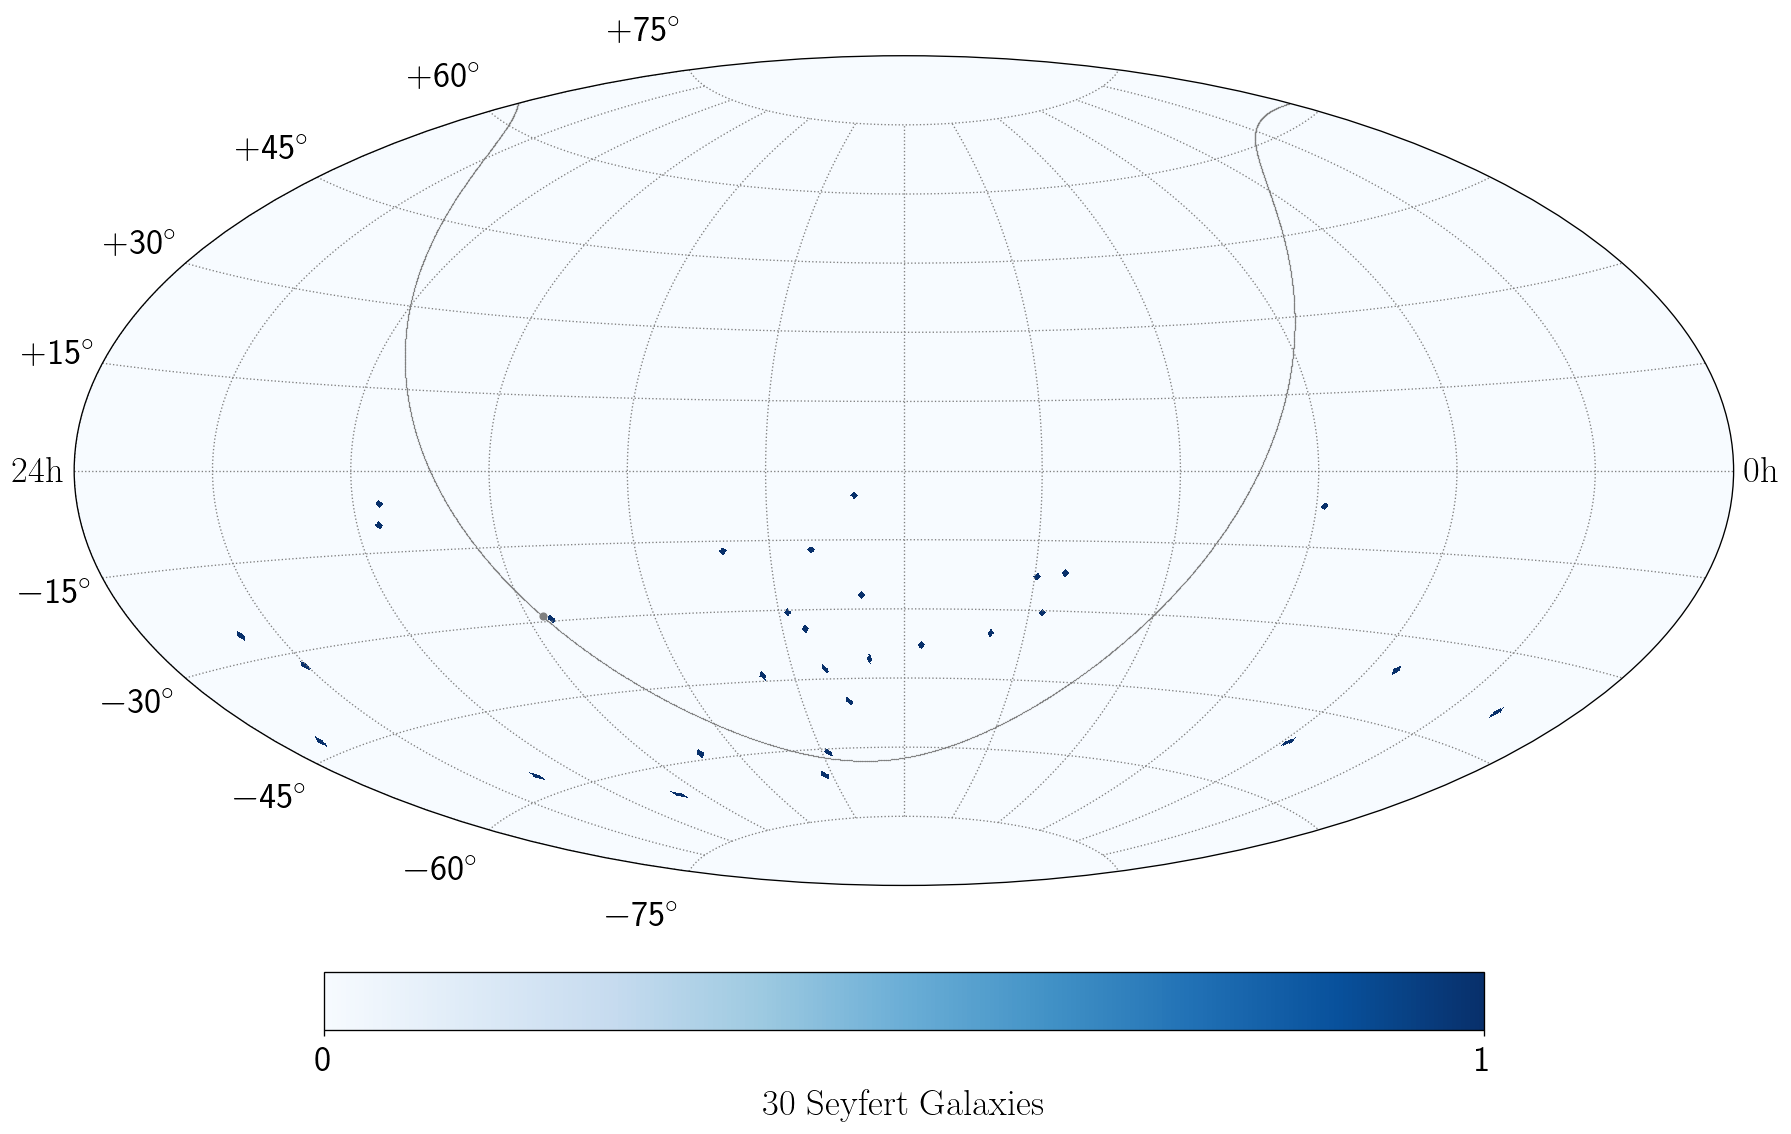

In [11]:
plot_sky_map_sig(cat)

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


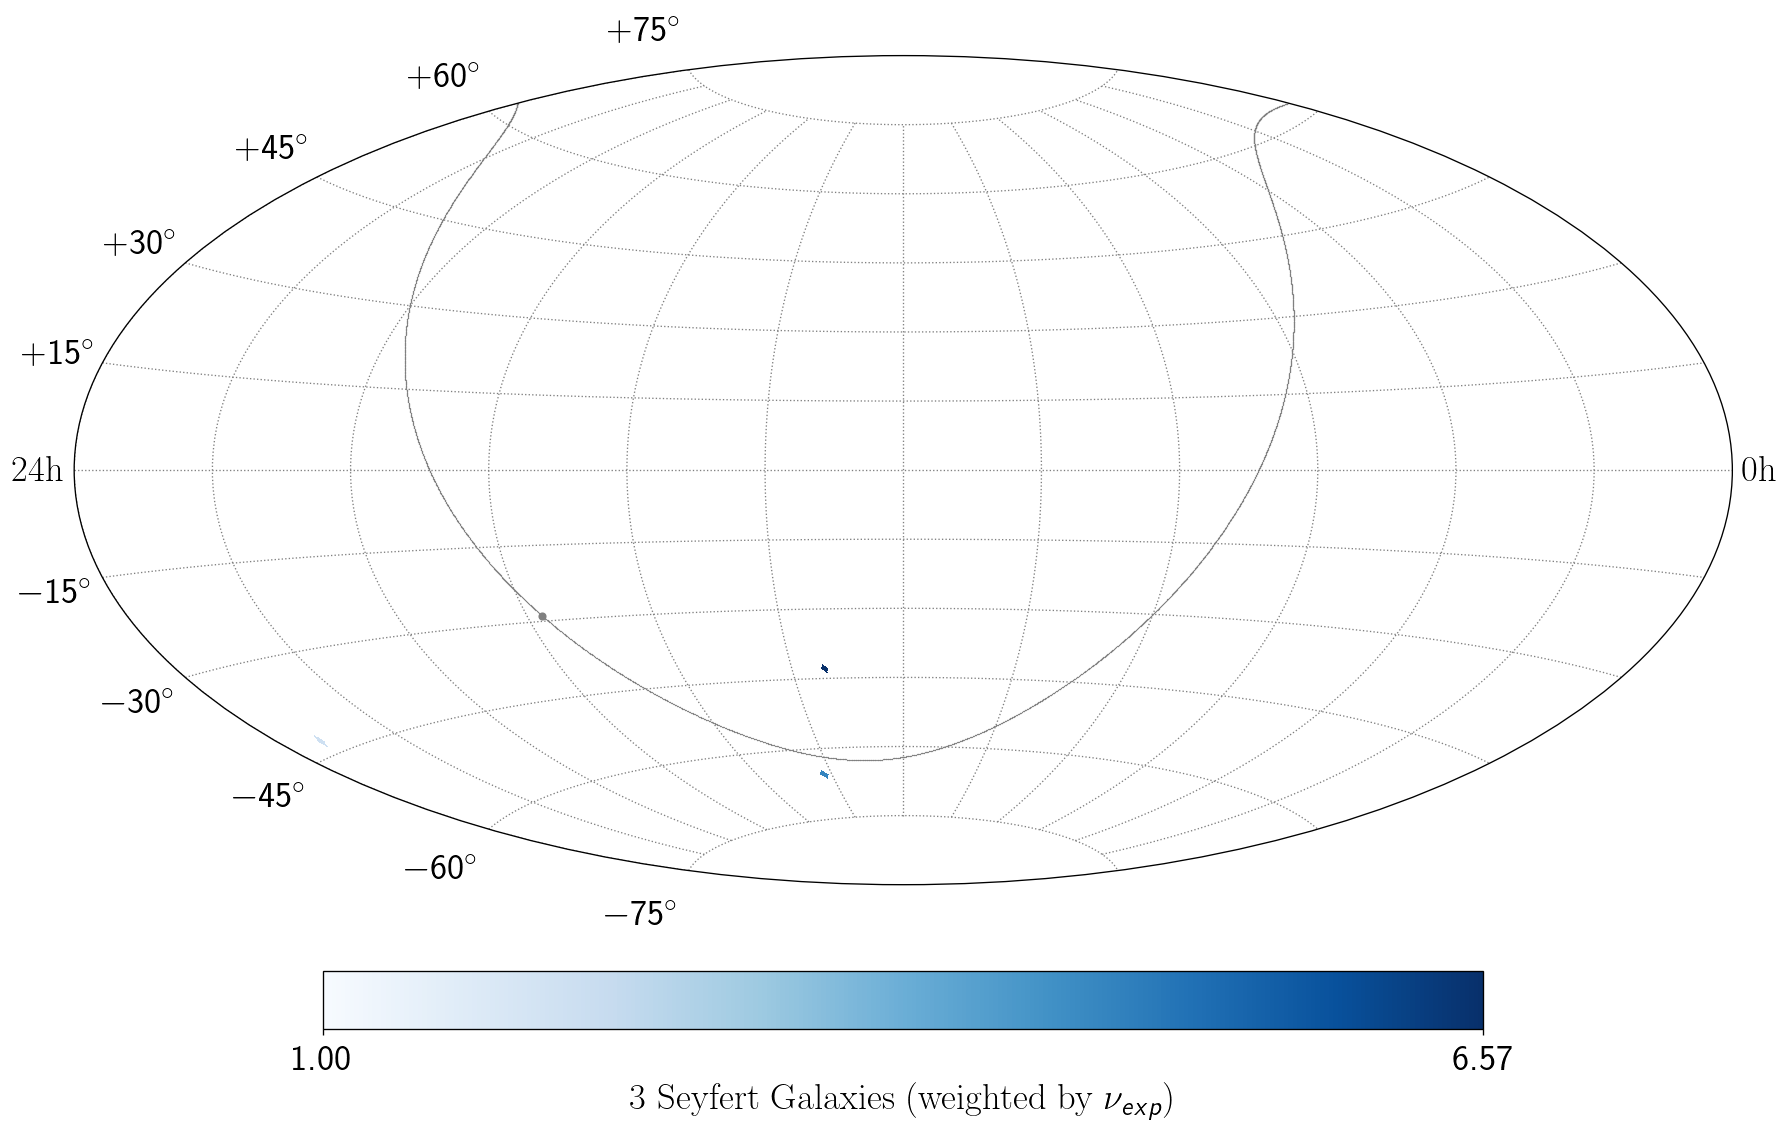

In [12]:
plot_sky_map_sig(cat, n=3, weighted=True)

In [13]:
src_dec = cat['DECdeg']
src_ra=cat['RAdeg']
src_name = cat['CTPT_NAME']
src_dist = cat['DIST']
src_logl = cat['logL2-10-intr']
src_nus = cat['neutrino_expectation_estes']
src_weight = cat['F2-10-intr']

In [14]:
src = cy.utils.sources(src_ra[1], src_dec[1], deg=True)

In [27]:
conf =get_seyfert_ps_conf(src, src_dist[1], src_logl[1], corona=True)

TypeError: get_seyfert_ps_conf() got an unexpected keyword argument 'corona'

In [16]:
tr   = cy.get_trial_runner(ana =ana, conf=conf, inj_conf=conf['inj_conf'],
                           mp_cpus=2,
                           src = src,
                           update_bg = False,
                           sigsub = True)

get custom acc_params
ps
mc bg only
from injector, acc_total:  5.335737823050757


In [17]:
def get_plot_from_csky_injector(src_ra=src_ra[1], src_dec=src_dec[1], src_name=src_name[1], src_dist=src_dist[1], src_logl=src_logl[1], src_weight=src_weight[1], ana=ana, Ninj=100000, nsource=30, conf=conf): #4 #0 #20
    src = cy.utils.sources(src_ra, src_dec, deg=True)
    conf['sindec_bandwidth']= np.sin(np.radians(2))/2
    conf['dec_rand_kwargs']=dict(randomization_width=np.radians(1)),
    conf['dec_rand_pole_exlusion']= np.radians(8)

    print(np.sin(np.radians(2)))
    tr = cy.get_trial_runner(ana =ana, inj_conf = conf['inj_conf'], src = src,  mp_cpus=2, logging=True)
    ninjs=tr.sig_n_injs(Ninj)
    #inject as pure signal
    inj_sig=tr.sig_injs[0].inject(ninjs)
    livetime=tr.sig_injs[0].ana.livetime
    inj_bg=tr.bg_injs[0].inject(ninjs)
    ev, nx =inj_sig
    bg_ev, bg_nx = inj_bg
    #print(len(ev)) --> 30
    plt.rcParams["text.usetex"] = False
    plt.figure()
    bins=np.logspace(2, 6)#, 100)
    #saving vars for weights
    acc_total=tr.sig_injs[0].acc_total
    #print(len(tr.sig_injs[0].weights)) = 30

    #creat an array of weights for the sampled events

    all_weights = []
    energys = []
    decs = []
    ras = []
    num = 0
    bg_decs = []
    bg_ras = []
    for ind in range(nsource):
        energy=ev[ind]['log10energy']#10**ev[0]['log10energy']
        dec = ev[ind]['dec']
        bg_dec = bg_ev[ind]['dec']
        decs = np.concatenate((decs, dec))
        bg_decs = np.concatenate((bg_decs, bg_dec))
        
        ra = ev[ind]['ra']
        bg_ra = bg_ev[ind]['ra']
        bg_ras = np.concatenate((bg_ras, bg_ra))
        
        ras = np.concatenate((ras, ra))
        energys = np.concatenate((energys, energy))
        num=ind
    """
        probs=tr.sig_injs[0].weights[ind]
        prob_ind=tr.sig_injs[0].indices[ind]
        #associate weights weights with event index
        ind_prob_dict=dict(zip(prob_ind,probs))
        evt_id=inj_sig[0][ind]['idx']
        #print(len(probs), len(prob_ind), len(evt_id))
        
        names = ['ind','probs']
        formats = ['i8','f8']
        dtype = dict(names = names, formats=formats)
        array = np.array(list(ind_prob_dict.items()), dtype=dtype)
        
        weights=[array[array['ind']==evt]['probs'] for evt in evt_id]
        weights=np.concatenate( weights, axis=0 )
        all_weights=np.concatenate((all_weights, weights))
    """
#    plt.hist(10**energys,bins=bins, density = True) #weights=all_weights)
    #n,bins,fig=plt.hist(ev[0]['dec'],bins=100)
#    plt.yscale('log')
#    plt.xscale('log')

#    plt.show()
    
    """    
    plt.figure()
    plt.hist(dec_degs, bins=20,weights=all_weights)
    plt.show()
    """    
    i=0
    src_mask = (abs(np.degrees(bg_ev[i]['dec']) - src_dec)<3) & (abs(np.degrees(bg_ev[i]['ra']) - src_ra)<3)
    
    print("Fraction of mc bg falling into +-3 degree square is: ", len(bg_ev[i][src_mask])/len(bg_ev[i]), ", from  ratio of src and mc bg: ", len(bg_ev[i][src_mask]), " and ", len(bg_ev[i]))
    print("N of mc bg events in src region : ",  len(bg_ev[i][src_mask]))
    print("compair to ns (68): ", len(bg_ev[i][src_mask])/68)
    
    fig, ax1 = plt.subplots(figsize=(30,30)) 
    for i in range(nsource):
        ax1.scatter(np.degrees(ev[i]['dec']), np.degrees(ev[i]['ra']), marker='o', alpha =0.5, label="Circinus Galaxy")
        #ax1.axvline(np.quantile(np.degrees(ev[i]['dec']), [0.1,0.9]))
        ax1.scatter(np.degrees(bg_ev[i]['dec']), np.degrees(bg_ev[i]['ra']), marker='d', alpha =0.5, label="Circinus Galaxy "+"bkg ")

        print("60% is +/- ", (np.quantile(np.degrees(ev[i]['dec']), 0.8)-np.quantile(np.degrees(ev[i]['dec']), 0.2))/2, "; 90% events: ", (np.quantile(np.degrees(ev[i]['dec']), 0.95)-np.quantile(np.degrees(ev[i]['dec']), 0.05))/2)
    ax1.legend(fontsize=30)
    ax1.set_ylim(0,360)
    ax1.set_xlim(-80, 40)
    ax1.set_xlabel("DEC ($\degree$)",fontsize=30)
    ax1.set_ylabel("RA ($\degree$)$",fontsize=30)
    plt.savefig('plots/masking/seyfert_{}_stacking_csky_injctor_signals_ra_dec.png'.format(nsource))
    
    #nx
    sig_map = heal.hist(50, decs, ras)#ev[0:-1]['dec'], ev[0:-1]['ra'])
    fig, ax = plt.subplots (figsize=(20,10), subplot_kw=dict (projection='aitoff'))
    cmap=cm.get_cmap('Greys')
    sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap=cmap))#, vmin=0, vmax =1))

    mesh, cb = sp.plot_map(ax, sig_map.map, n_ticks=2)
    kw = dict(color='.5', alpha=0.5)
    sp.plot_gp(ax, lw=.5, **kw)
    sp.plot_gc(ax, **kw)
    cb.set_label ('Injected {} Seyfert Galaxies'.format(num+1))

    ax.grid(**kw)
    plt.tight_layout()
    plt.savefig('plots/masking/seyfert_{}_sky_map.png'.format(nsource),bbox_inches='tight')
    
    bg_map = heal.hist(50, bg_decs, bg_ras)#ev[0:-1]['dec'], ev[0:-1]['ra'])
    fig, ax = plt.subplots (figsize=(20,10), subplot_kw=dict (projection='aitoff'))
    cmap=cm.get_cmap('Greys')
    sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap=cmap))#, vmin=0, vmax =1))

    mesh, cb = sp.plot_map(ax, bg_map.map, n_ticks=2)
    kw = dict(color='.5', alpha=0.5)
    sp.plot_gp(ax, lw=.5, **kw)
    sp.plot_gc(ax, **kw)
    cb.set_label ('Injected {} Seyfert Galaxies'.format(num+1))

    ax.grid(**kw)
    plt.tight_layout()
    plt.savefig('plots/masking/seyfert_{}_sky_map_bg.png'.format(nsource),bbox_inches='tight')
    
    #return energys, livetime, conf

0.03489949670250097
default flux is powerlaw 3
ps
mc bg only
from injector, acc_total:  5.335737823050757
Fraction falling into +-3 degree square is:  9.216589861751152e-05
Events number:  1
compair to ns (68):  0.014705882352941176
60% is +/-  2.073733139038083 ; 90% events:  14.940071868896474


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 720x480 with 0 Axes>

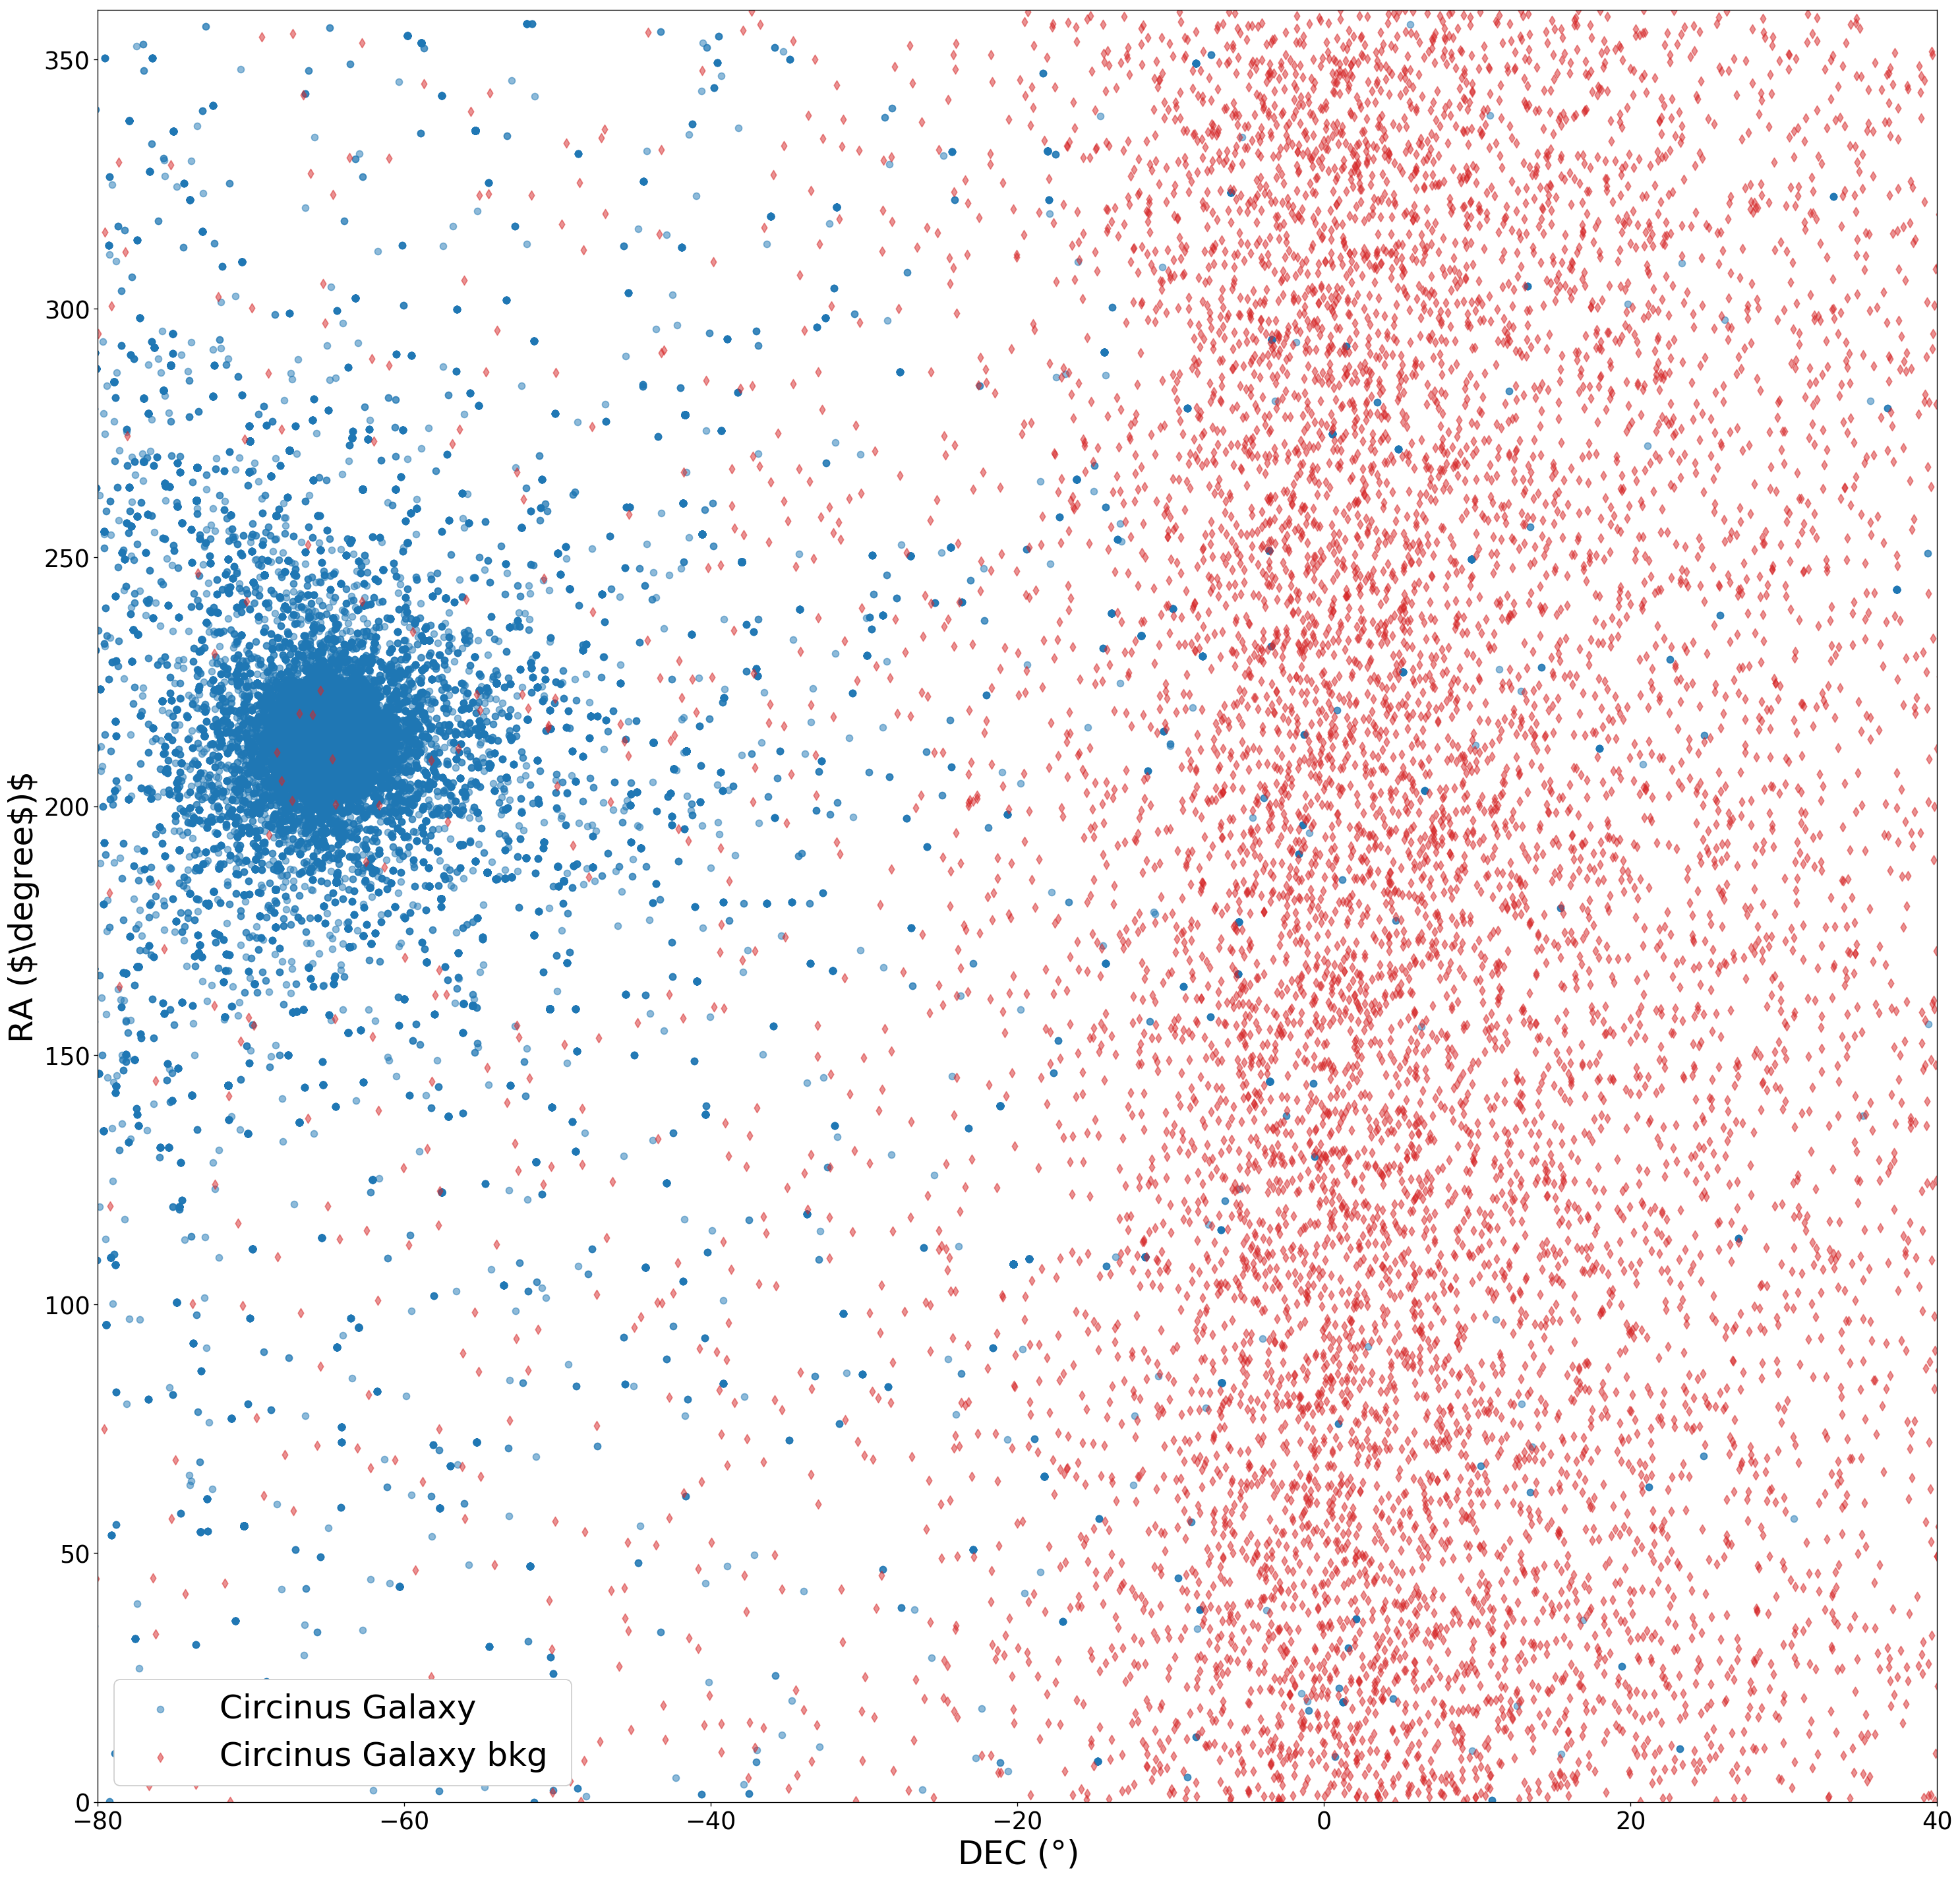

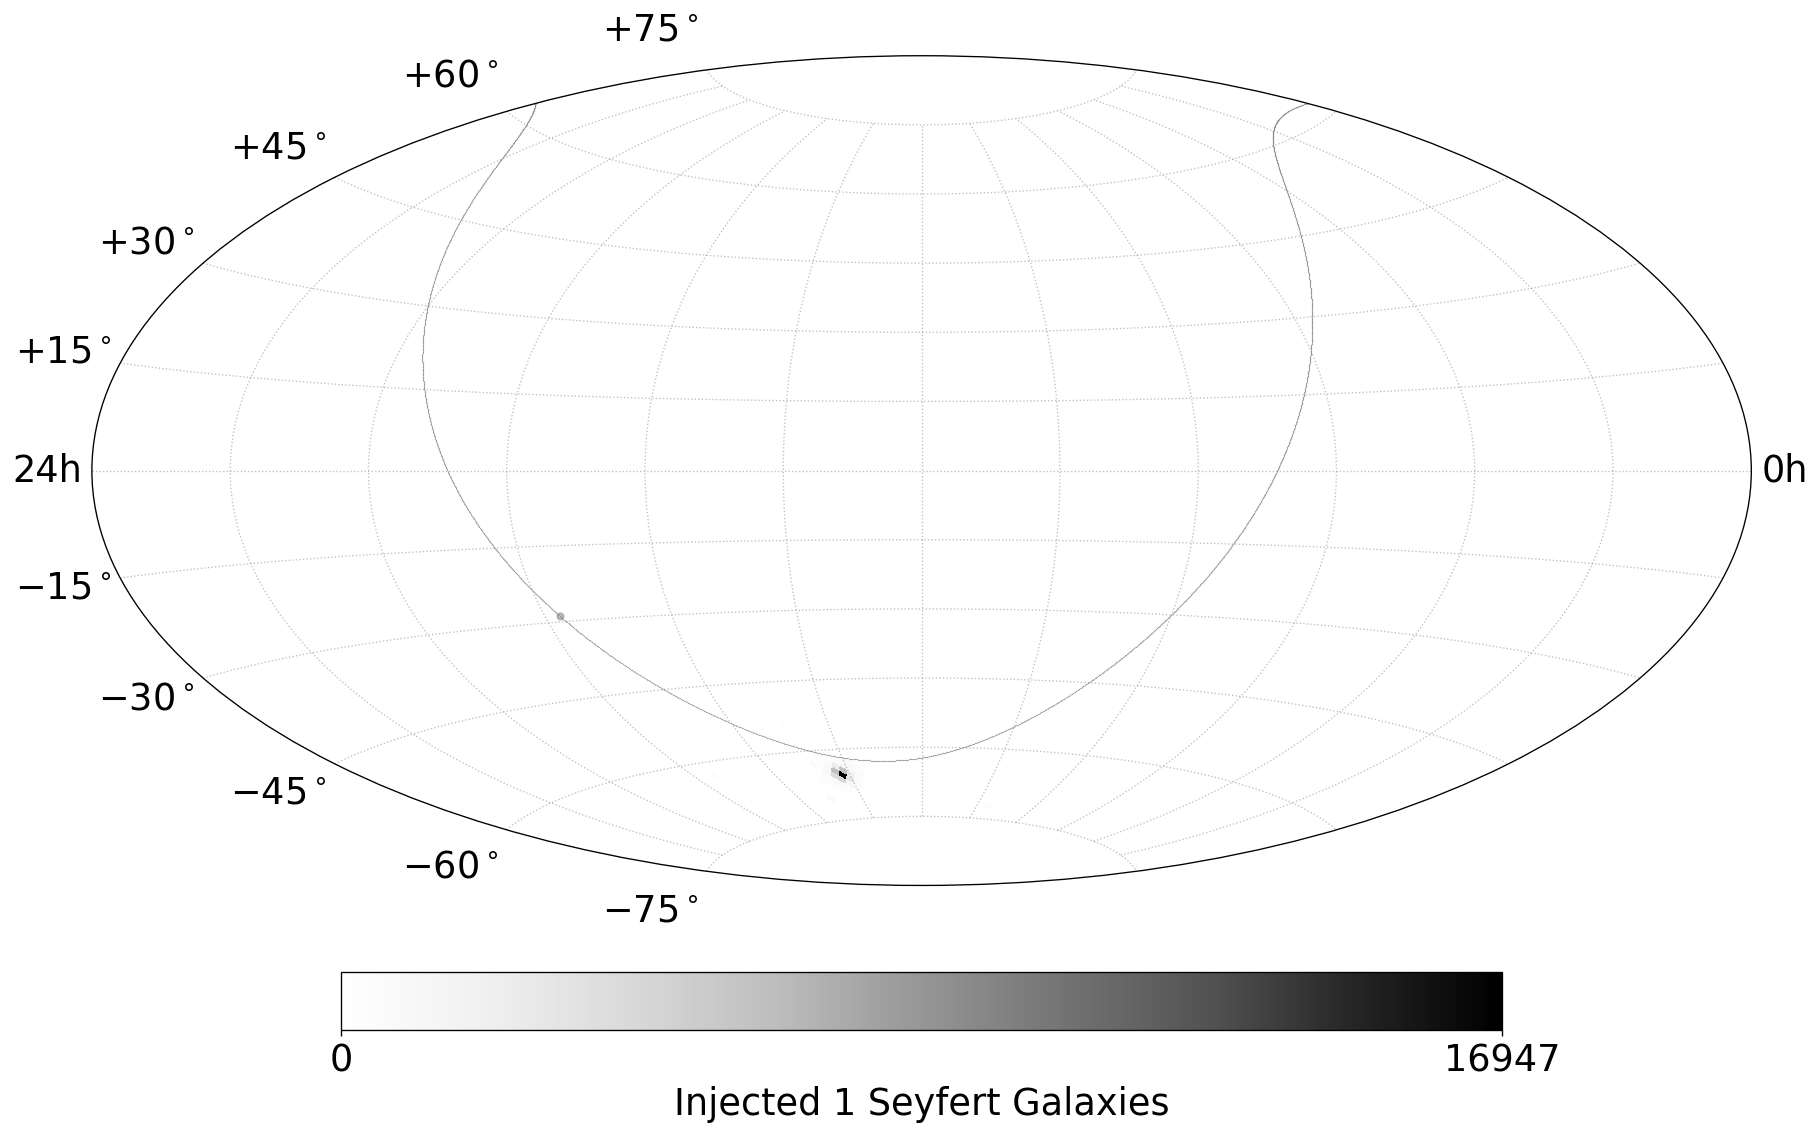

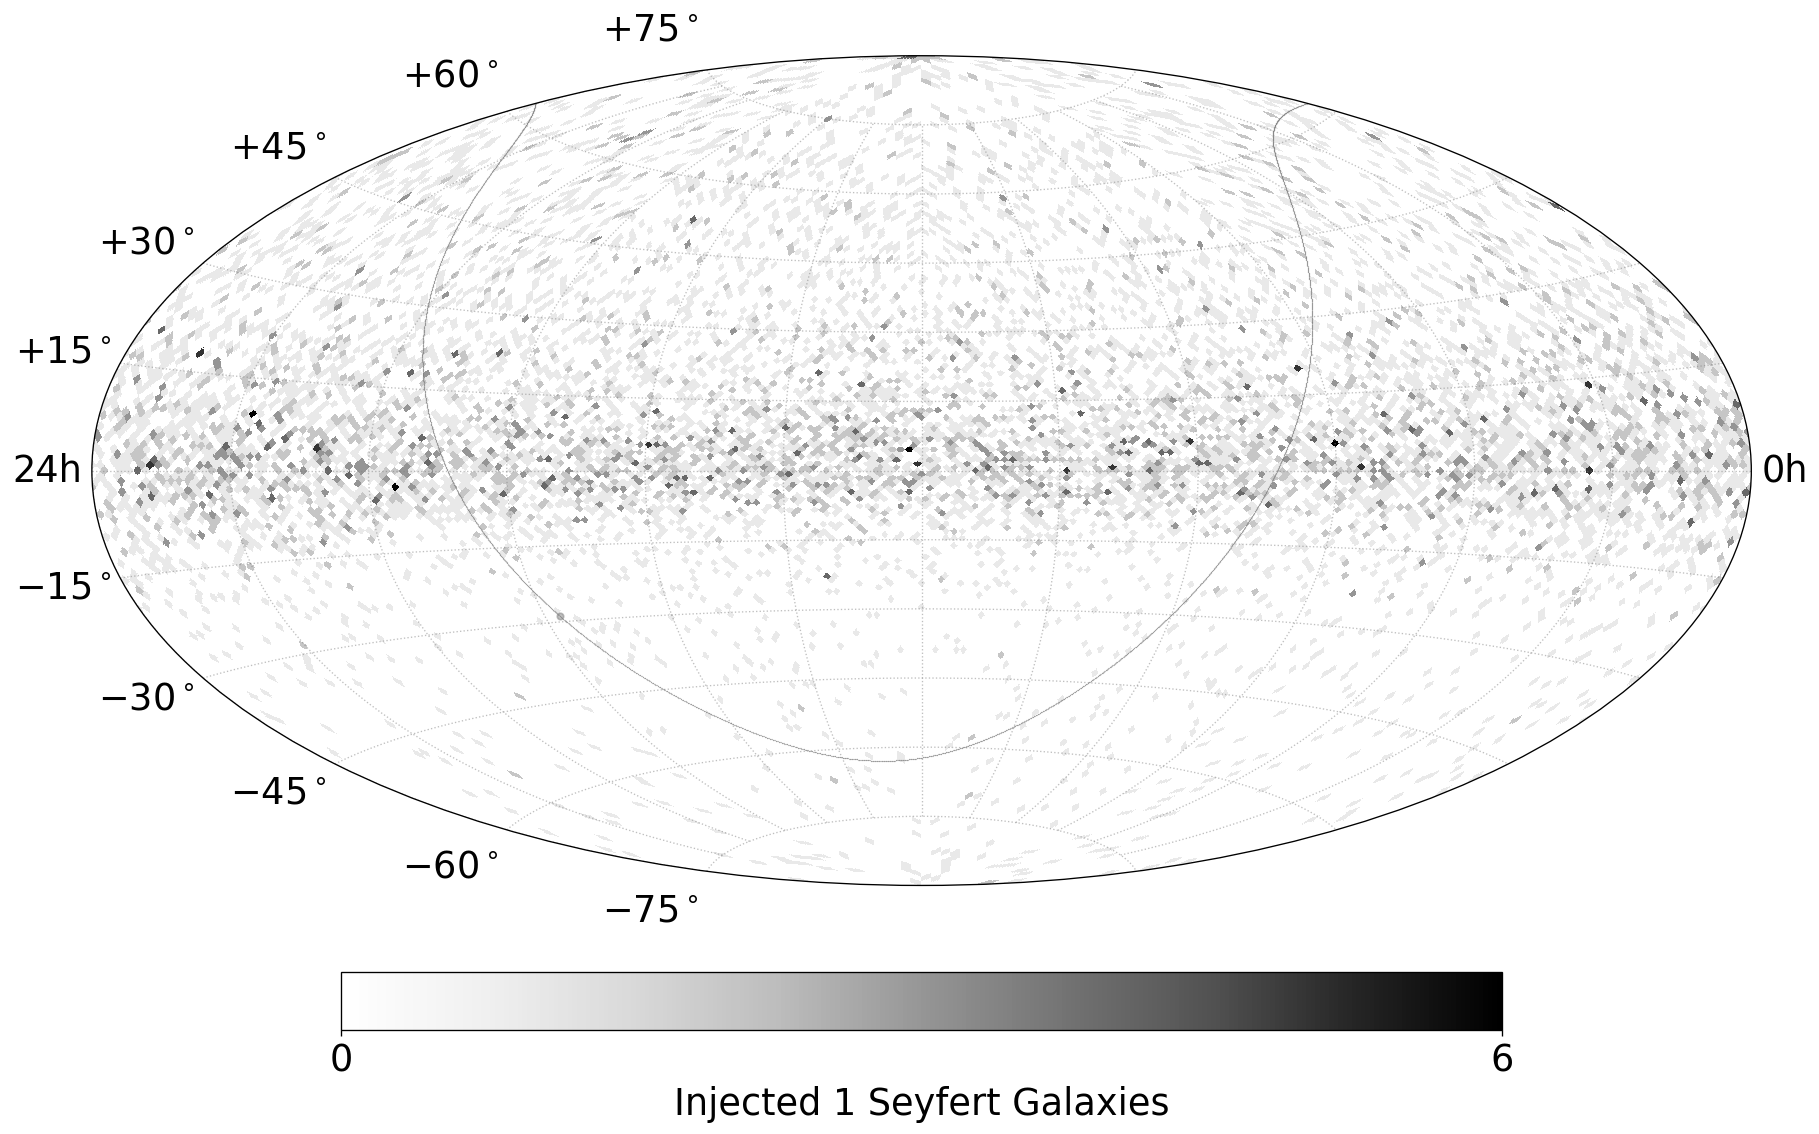

In [18]:
get_plot_from_csky_injector(Ninj=100000, nsource=1)

In [19]:
def plot_sky_map_bg(ana,mask_deg):
    a = ana['ESTES_2011_2021']
    bg_data= a.sig_mask
    bg_map = heal.hist(512, bg_data.dec, bg_data.ra)

    fig, ax = plt.subplots (figsize=(10,8), subplot_kw=dict (projection='aitoff'))
    sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap='Blues', vmin=0,vmax=1))
    mesh, cb = sp.plot_map(ax, bg_map.map, n_ticks=2)

    kw = dict(color='.5', alpha=.5)
    sp.plot_gp(ax, lw=.5, **kw)
    sp.plot_gc(ax, **kw)
    cb.set_label ('Events')

    ax.grid(**kw)
    plt.tight_layout()
    plt.savefig('plots/masking/masked_sky_plane_source_{}.png'.format(mask_deg),bbox_inches='tight')

In [20]:
krag5_map, krag5_energy_bins = cy.selections.mrichman_repo.get_template(
        'KRA-gamma_5PeV_maps_energies', per_pixel_flux=True)
kra_flux = cy.hyp.BinnedFlux(
                bins_energy=krag5_energy_bins,
                flux=krag5_map.sum(axis=0))

Reading /data/user/mrichman/data/analyses/templates/KRA-gamma_5PeV_maps_energies.tuple.npy ...


In [21]:
sigmas = ana[0].sig.sigma
smears = np.logspace(np.log10(min(sigmas)), np.log10(max(sigmas)), 50+1)
krag5_conf = {'ana':ana,
              'template': krag5_map,
              'bins_energy': krag5_energy_bins,
              'fitter_args': dict(gamma=2.5),
              'update_bg' : False,
              'sigsub': True,
              'sigmas': smears,
            'dir': cy.utils.ensure_dir('{}/templates/kra5'.format(ana_dir))}
inj_conf =  {'bg_weight_names':['astro_weight', 'atmo_weight', 'muon_weight'],
                 'randomize'      :['ra', 'dec']}

In [22]:
tr = cy.get_trial_runner(krag5_conf,  
                        inj_conf = inj_conf,
                        update_bg = False, 
                        sigsub    = True,
                        )

template
<- /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/analyses/baseline_analysis/ana/templates/kra5/ESTES_2011_2021.template.npy    
Restore successful.
mc bg only
inject template as signal:


In [23]:
acc_total = tr.sig_inj_acc_total
model_norm = 0.89
ns = model_norm*acc_total
ns

68.0053756309758

In [24]:
n_trials=1000
seed = 0
trials = tr.get_many_fits (
        n_trials, n_sig=int(ns), poisson=True, seed=0, logging=True)

Performing 1000 trials with n_sig = 68.000 (poisson) using 1 core:
          0/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
         10/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector typ

bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        110/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroun

bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        210/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroun

bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        310/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroun

bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        410/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroun

bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        510/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        520/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg in

bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        620/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroun

bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        720/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroun

bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        820/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroun

bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
        920/1000 trials complete...bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroundInjector object at 0x7fc7eafed450>
bkg injector type:  <csky.inj.MCBackgroun

In [25]:
def get_plot_from_trials(src_dec=src_dec[1], src_ra=src_ra[1], Ninj = 100, deg = 10, tr = tr): #4 #0 #20
    
    ninjs=tr.sig_n_injs(Ninj)
    #inject as pure signal
    inj_sig=tr.sig_injs[0].inject(ninjs)
    livetime=tr.sig_injs[0].ana.livetime

    ev, nx =inj_sig
    #print(len(ev)) --> 30
    plt.rcParams["text.usetex"] = False
    plt.figure()
    bins=np.logspace(2, 6)#, 100)
    #saving vars for weights
    acc_total=tr.sig_injs[0].acc_total
    #print(len(tr.sig_injs[0].weights)) = 30

    #creat an array of weights for the sampled events

    all_weights = []
    energys = []
    decs = []
    ras = []
    num = 0
    for ind in range(1):
        energy=ev[ind]['log10energy']#10**ev[0]['log10energy']
        dec = ev[ind]['dec']
        decs = np.concatenate((decs, dec))
        ra = ev[ind]['ra']
        ras = np.concatenate((ras, ra))
        energys = np.concatenate((energys, energy))
        num=ind
        """
        probs=tr.sig_injs[0].weights[ind]
        prob_ind=tr.sig_injs[0].indices[ind]
        #associate weights weights with event index
        ind_prob_dict=dict(zip(prob_ind,probs))
        evt_id=inj_sig[0][ind]['idx']
        #print(len(probs), len(prob_ind), len(evt_id))
        
        names = ['ind','probs']
        formats = ['i8','f8']
        dtype = dict(names = names, formats=formats)
        array = np.array(list(ind_prob_dict.items()), dtype=dtype)
        
        weights=[array[array['ind']==evt]['probs'] for evt in evt_id]
        weights=np.concatenate( weights, axis=0 )
        all_weights=np.concatenate((all_weights, weights))
        """
#    plt.hist(10**energys,bins=bins, density = True) #weights=all_weights)
    #n,bins,fig=plt.hist(ev[0]['dec'],bins=100)
#    plt.yscale('log')
#    plt.xscale('log')

#    plt.show()
    
    """    
    plt.figure()
    plt.hist(dec_degs, bins=20,weights=all_weights)
    plt.show()
    """    
    
    fig, ax1 = plt.subplots(figsize=(30,30)) 
    i=0
    ax1.scatter(np.degrees(ev[i]['dec']), np.degrees(ev[i]['ra']), marker='o', alpha =0.5, label="injected GP signal")
        #ax1.axvline(np.quantile(np.degrees(ev[i]['dec']), [0.1,0.9]))
    
    circle = plt.Circle(( src_dec ,src_ra ), deg, fill = False, label = str(deg)+" degree around Circinus Galaxy" )
    plt.legend()
    ax1.add_artist( circle)
    src_mask = (abs(np.degrees(ev[i]['dec']) - src_dec)<3) & (abs(np.degrees(ev[i]['ra']) - src_ra)<3)
    
    print("Fraction falling into +-3 degree square is: ", len(ev[i][src_mask])/len(ev[i]))
    print("Events number: ",  len(ev[i][src_mask]))
    print("compair to ns (68): ", len(ev[i][src_mask])/68)
    #print("60% is +/- ", (np.quantile(np.degrees(ev[i]['dec']), 0.8)-np.quantile(np.degrees(ev[i]['dec']), 0.2))/2, "; 90% events: ", (np.quantile(np.degrees(ev[i]['dec']), 0.95)-np.quantile(np.degrees(ev[i]['dec']), 0.05))/2)
    
    ax1.legend(fontsize=30)
    ax1.set_ylim(0,360)
    ax1.set_xlim(-80, 40)
    ax1.set_xlabel("DEC ($\degree$)",fontsize=30)
    ax1.set_ylabel("RA ($\degree$)$",fontsize=30)
    plt.savefig('plots/gp_injctor_signals_ra_dec_circinus.png')
    
    #nx
    sig_map = heal.hist(50, decs, ras)#ev[0:-1]['dec'], ev[0:-1]['ra'])
    fig, ax = plt.subplots (figsize=(20,10), subplot_kw=dict (projection='aitoff'))
    cmap=cm.get_cmap('Greys')
    sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap=cmap))#, vmin=0, vmax =1))

    mesh, cb = sp.plot_map(ax, sig_map.map, n_ticks=2)
    kw = dict(color='.5', alpha=0.5)
    sp.plot_gp(ax, lw=.5, **kw)
    sp.plot_gc(ax, **kw)
    cb.set_label ('Injected {} Seyfert Galaxies'.format(num+1))

    ax.grid(**kw)
    plt.tight_layout()
    plt.savefig('plots/masking/seyfert_gp_sky_map.png',bbox_inches='tight')
    src_decs = np.radians(np.linspace(src_dec-5, src_dec+5, 10))
    src_ras = np.radians(np.linspace(src_ra-5, src_ra+5, 10))
    src_decs_ex=[]
    src_ras_ex=[]
    for dec in src_decs:
        for ra in src_ras:
            src_decs_ex.append(dec)
            src_ras_ex.append(ra)

    sig_map = heal.hist(50, src_decs_ex, src_ras_ex)#ev[0:-1]['dec'], ev[0:-1]['ra'])
    fig, ax = plt.subplots (figsize=(20,10), subplot_kw=dict (projection='aitoff'))
    cmap=cm.get_cmap('Blues')
    sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap=cmap))#, vmin=0, vmax =1))

    mesh, cb =sp.plot_map(ax, sig_map.map, n_ticks=2)
    kw = dict(color='.5', alpha=0.5)
    sp.plot_gp(ax, lw=.5, **kw)
    sp.plot_gc(ax, **kw)
    cb.set_label ('Injected {} Seyfert Galaxies'.format(num+1))


Fraction falling into +-3 degree square is:  0.0003
Events number:  3
compair to ns (68):  0.04411764705882353


<Figure size 720x480 with 0 Axes>

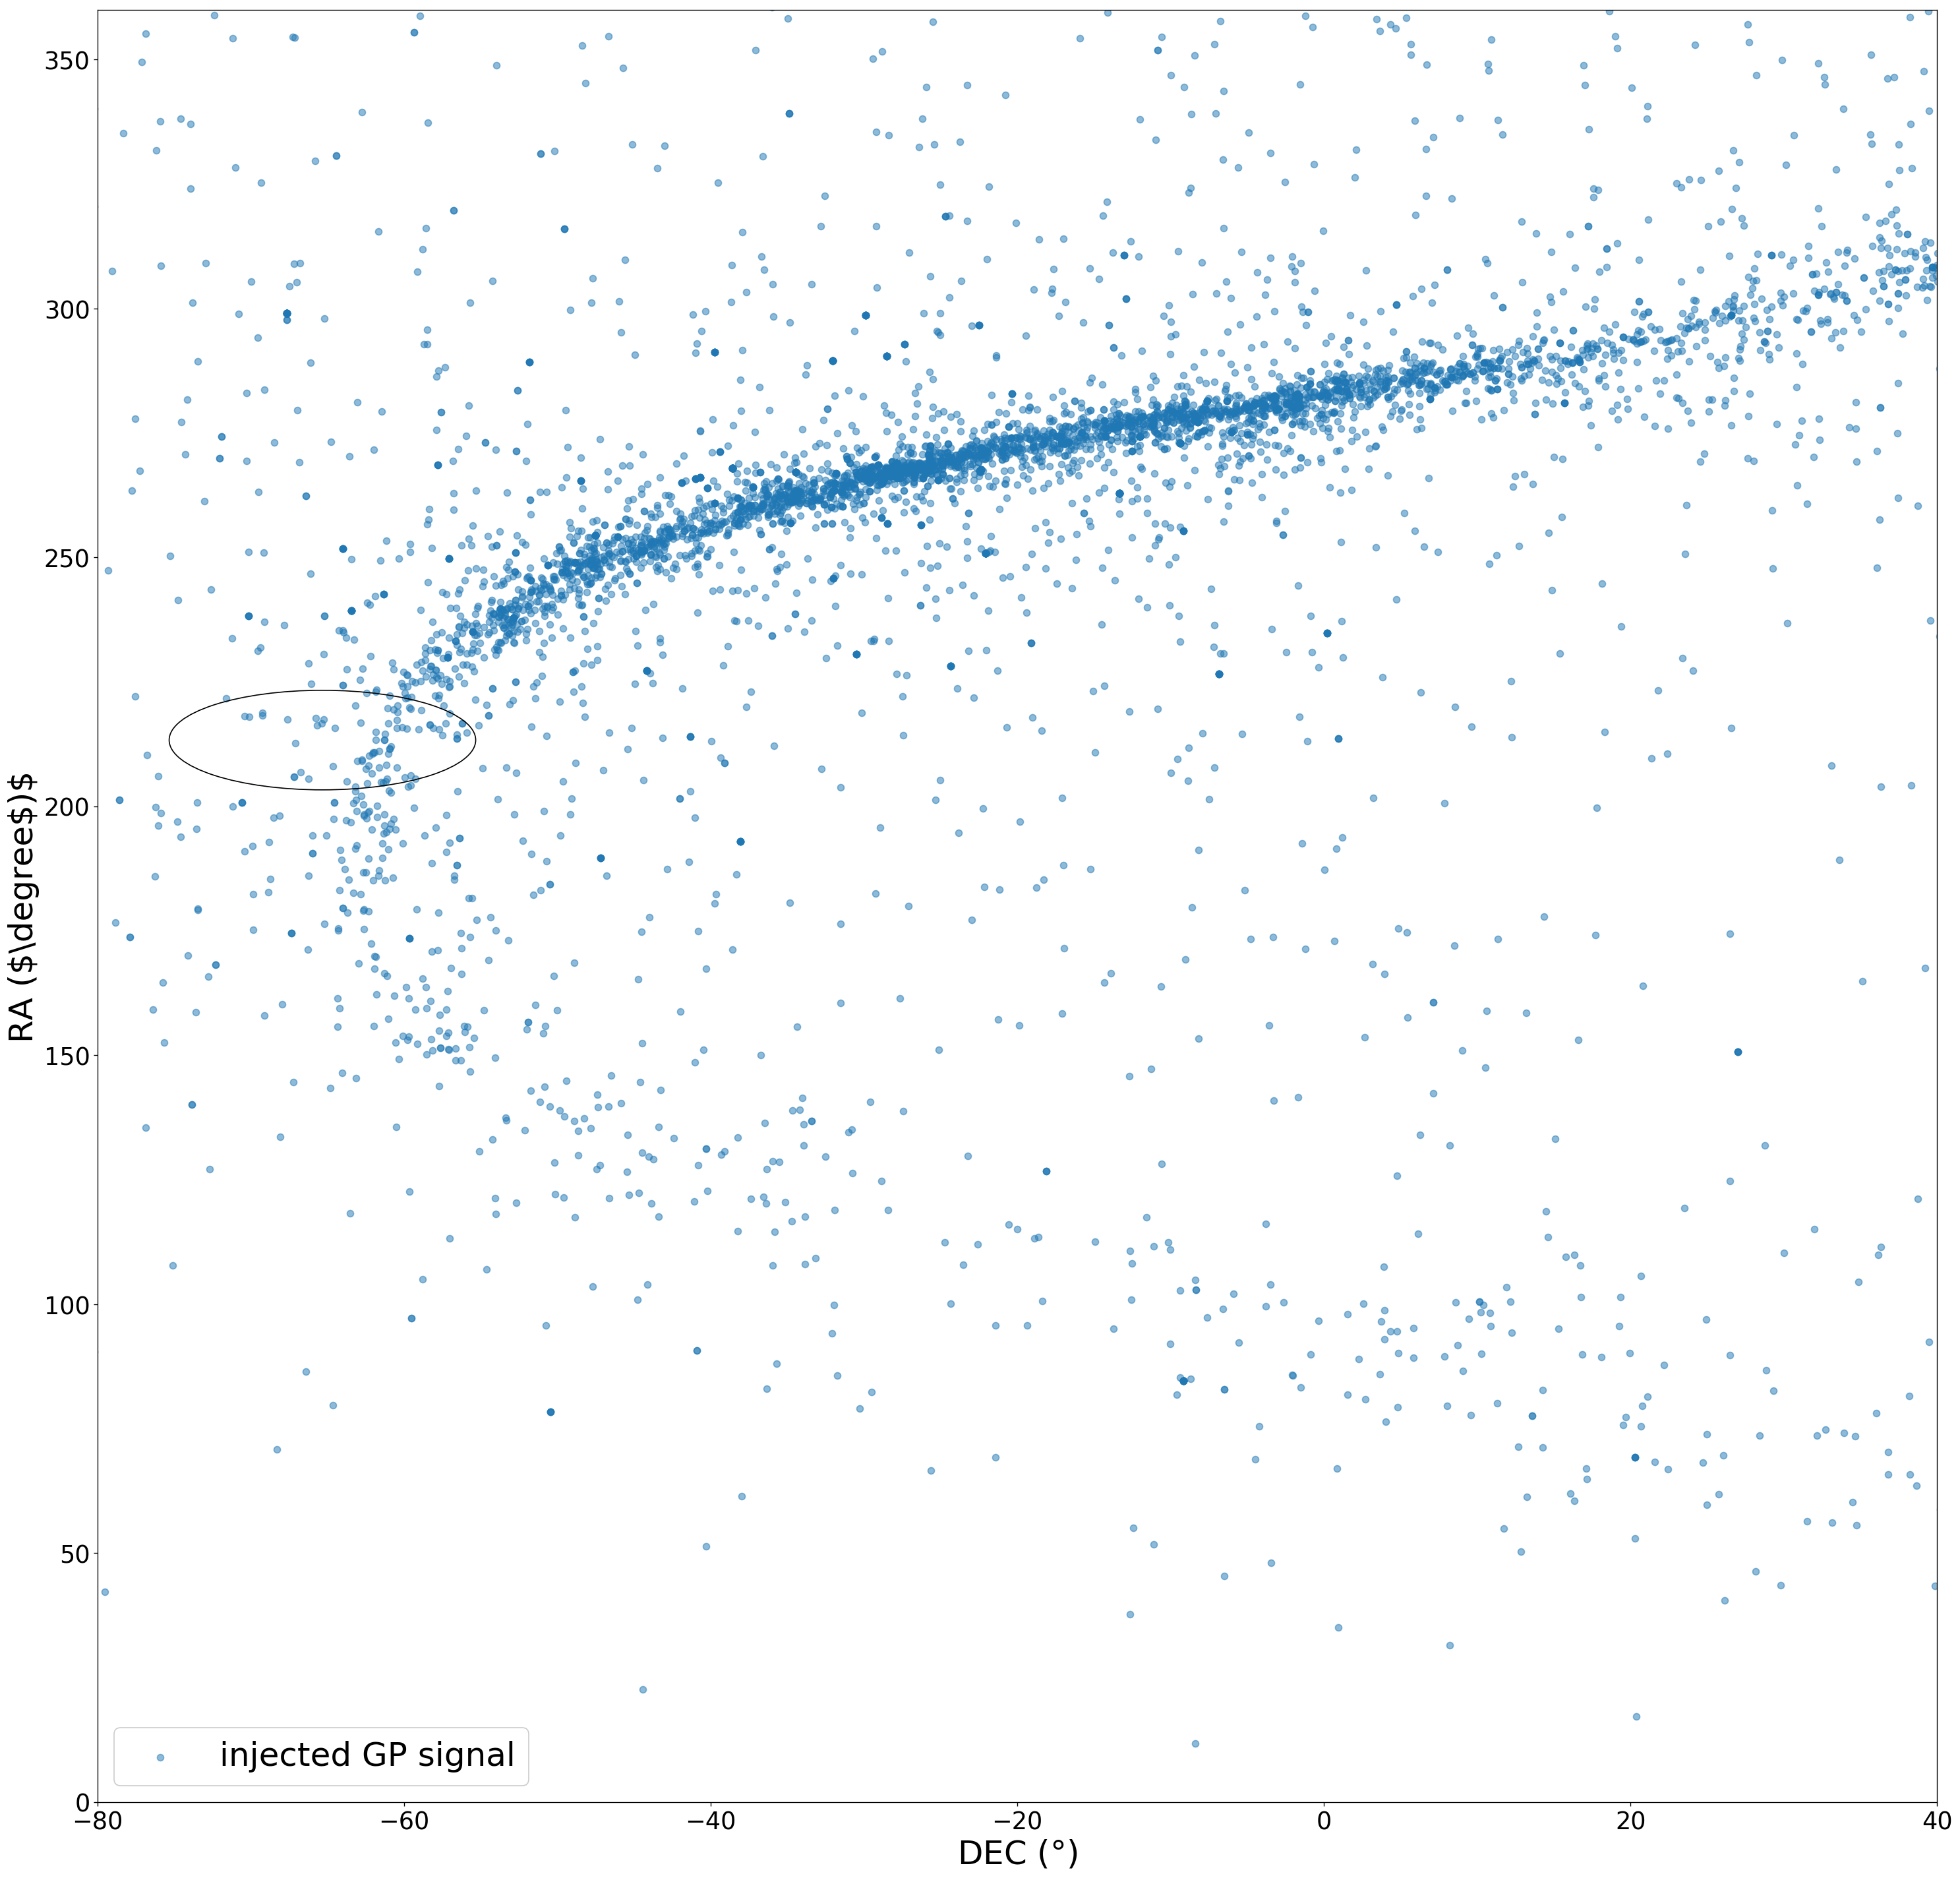

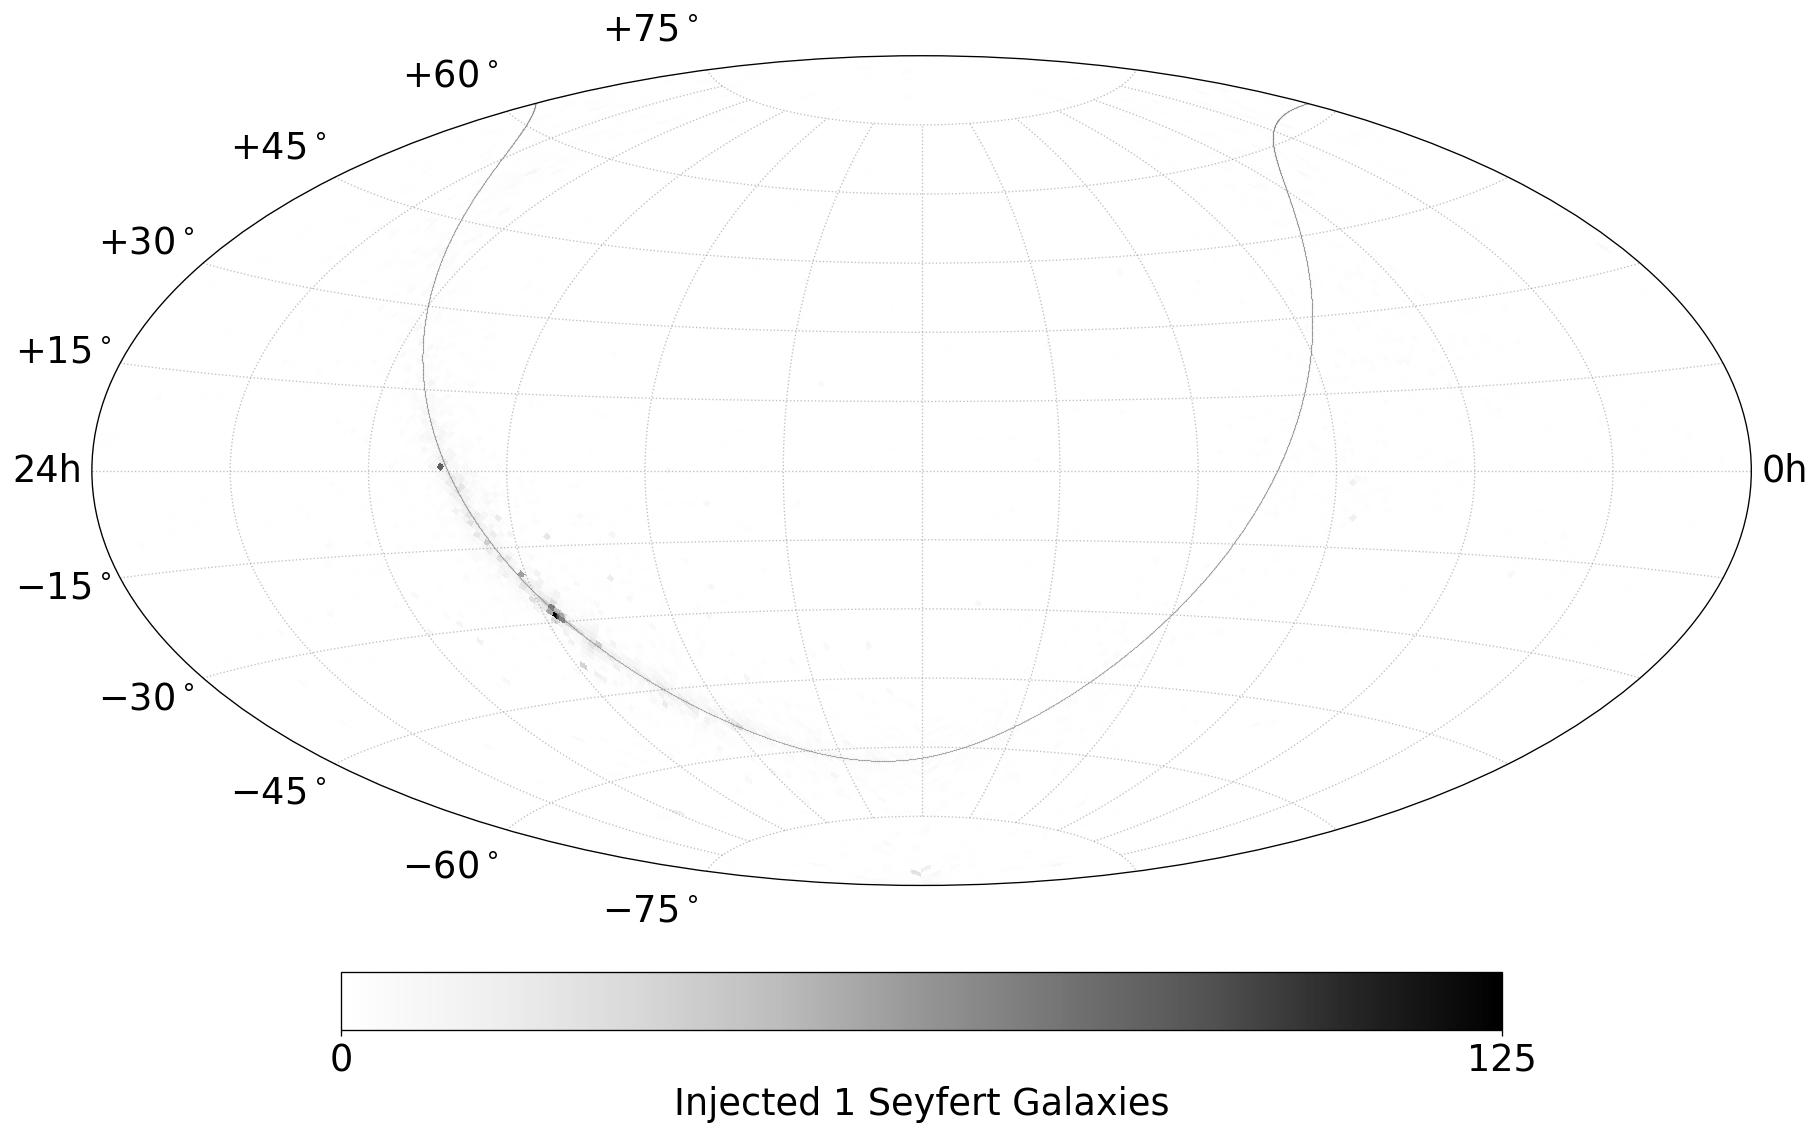

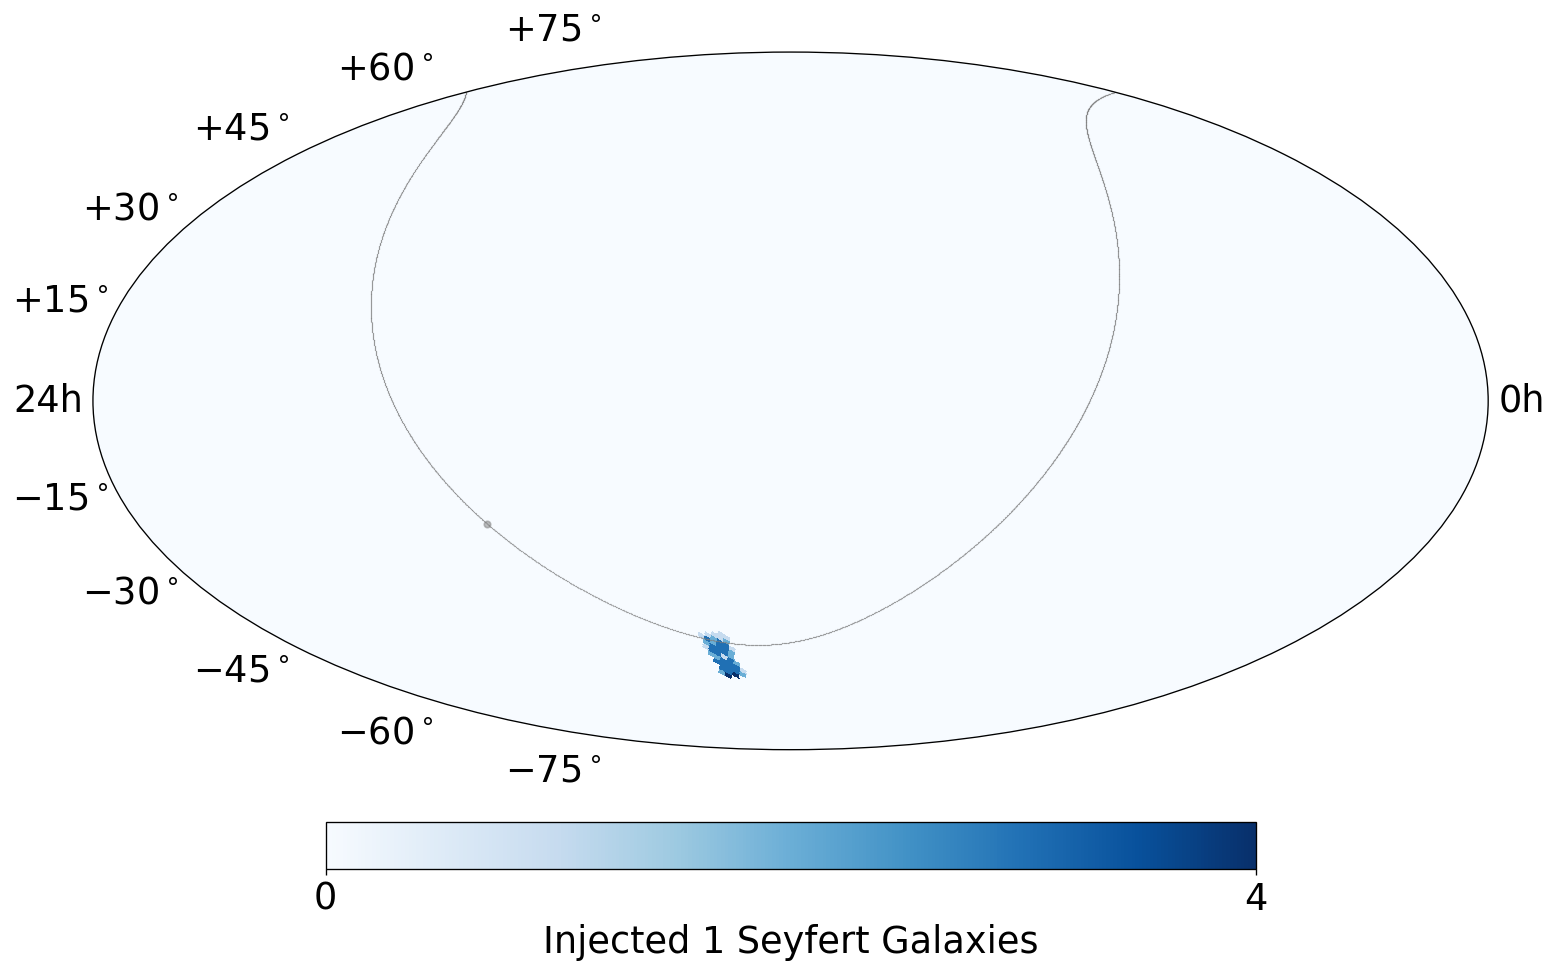

In [26]:
get_plot_from_trials(Ninj=10000)

In [ ]:
def plot_sky_map_bg_from_file(trials):
    a = ana['DNNCascade_10yr']
    bg_data, data = a.bg_data, a.data
    bg_map = heal.hist(512, bg_data.dec, bg_data.ra)

    fig, ax = plt.subplots (figsize=(10,8), subplot_kw=dict (projection='aitoff'))
    sp = cy.plotting.SkyPlotter(pc_kw=dict(cmap='Greys', vmin=0,vmax=1))
    mesh, cb = sp.plot_map(ax, bg_map.map, n_ticks=2)

    kw = dict(color='.5', alpha=.5)
    sp.plot_gp(ax, lw=.5, **kw)
    sp.plot_gc(ax, **kw)
    cb.set_label ('Events')

    ax.grid(**kw)
    plt.tight_layout()
    plt.savefig('masking/masked_sky_{}.png'.format(mask_deg),bbox_inches='tight')